In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
kernel = np.ones((3, 3))
k=kernel/np.sum(kernel)
print(k)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


# BARTLETT

In [57]:
def bartlett_kernel(size):
    if size % 2 == 0:
        raise ValueError("El tamaño del kernel debe ser impar.")

    kernel = np.zeros((size,size))
    mid = size // 2    

    for x,y in np.ndindex((mid+1,mid+1)):
        kernel[x,y]=(y+1)*(x+1)
                
    kernel[:mid+1,mid+1:] = np.flip(kernel[:mid+1,:mid],axis=1) 
    kernel[mid+1:,:] = np.flip(kernel[:mid,:],axis=0)      
            
    return kernel/np.sum(kernel)
        

In [58]:
bartlett = bartlett_kernel(5)
print(bartlett)

[[0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.03703704 0.07407407 0.11111111 0.07407407 0.03703704]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]]


# GAUSSIANO

In [26]:
def gaussiano_kernel(dim):
    if dim <= 0:
        raise ValueError("La dimensión debe ser mayor que 0")
    
    ar=np.array([1])
    
    while len(ar) < dim:
        f = np.ones(len(ar) + 1)
        f[1:-1] = ar[:-1]+ar[1:]
        ar = f

    kernel = ar.reshape(-1, 1) * ar
    return kernel/np.sum(kernel)

In [27]:
gausiano = gaussiano_kernel(5)
print(gausiano)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


# LAPLACIANO

In [5]:
def laplaciano_kernel(v):
    kernel = None
    if v==4:
        kernel = np.zeros((3,3))
        kernel[1,:] = -1
        kernel[:,1] = -1
        kernel[1,1] = 4
    if v==8:
        kernel = np.ones((3,3))*(-1)
        kernel[1,1] = 8
    return kernel

In [44]:
laplaciano = laplaciano_kernel(4)
print(laplaciano)

[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]


# SOBEL

In [50]:
def sobel_kernel(orientacion):
    f = np.array([1, 2, 1])
    kernel = np.zeros((3, 3))
    f_flat = f.flatten()  # Convertmos 'f' en un array unidimensional
    
    if orientacion == 'Oeste':
        kernel[:, 0] = f_flat 
        kernel[:, 2] = f_flat * (-1)
    elif orientacion == 'Este':
        kernel[:, 0] = f_flat * (-1)
        kernel[:, 2] = f_flat
    elif orientacion == 'Norte':
        kernel[0, :] = f_flat
        kernel[2, :] = f_flat * (-1)
    else:
        kernel[0, :] = f_flat * (-1)
        kernel[2, :] = f_flat
    
    return kernel

In [68]:
sobel = sobel_kernel('Este')
print(sobel)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


# FUNCION DE CONVOLUCION

In [9]:
def _convolution1(image, kernel = np.ones((1,1))):
    convolved = np.zeros((np.array(image.shape)-np.array(kernel.shape)+1))
    print('****',convolved.shape)
    for x in range(convolved.shape[0]):
        for y in range(convolved.shape[1]):
            convolved[x,y] = (image[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    return convolved

In [10]:
def _convolution2(image, kernel = np.ones((1,1))):
    convolved = np.zeros((np.array(image.shape)-np.array(kernel.shape)+1))
    print
    for x, y in np.ndindex(convolved.shape):
        convolved[x,y] = (image[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    return convolved

# PRUEBA DE IMAGEN

In [12]:
# Paso 2: Funcion que cambia de espacio de color de RGB a YIQ
def rgb_to_yiq(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:, :, 0] = 0.229 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2]
    yiq[:, :, 1] = 0.595716 * rgb[:, :, 0] - 0.274453 * rgb[:, :, 1] - 0.321263 * rgb[:, :, 2]
    yiq[:, :, 2] = 0.211456 * rgb[:, :, 0] - 0.522591 * rgb[:, :, 1] + 0.311135 * rgb[:, :, 2]
    return yiq

In [64]:
#Convertir R’G’B’ a bytes y graficar el pixel
def RGB_to_bytes(img):
    return np.clip(img,0,1)

C:\Users\Luciano-PC\AppData\Local\Temp\ipykernel_35152\1003623936.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.clip(imageio.imread('fuente.bmp') / 255.0, 0.0, 1.0)


**** (252, 252)
**** (252, 252)
**** (252, 252)


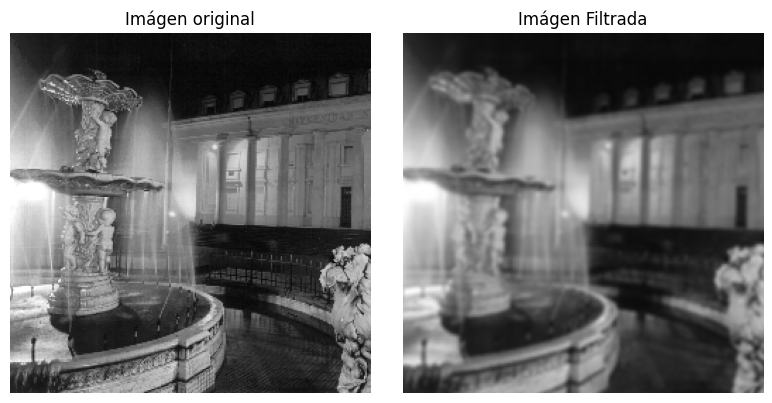

In [70]:
# Cargar la imagen y el kernel
im = np.clip(imageio.imread('fuente.bmp') / 255.0, 0.0, 1.0)
#im = np.clip(imageio.imread('chip_blackwhite.bmp') / 255.0, 0.0, 1.0)

#yiq = rgb_to_yiq(im)

#im2=_convolution1(yiq[:, :, 0],laplaciano)
'''
Luego de palicar laplaciano:
si la luminancia es menor que cero, se coerciona a cero, o si es mayor que uno se
coerciona a uno.'''

R = _convolution1(im[:,:,0], bartlett)
G = _convolution1(im[:,:,1], bartlett)
B = _convolution1(im[:,:,2], bartlett)

# Apila los canales R, G y B en una sola imagen
im3 = np.dstack((R, G, B))

#plt.imshow(im3)
#plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(im)
plt.title("Imágen original")
plt.axis('off')
plt.subplot(122)
plt.imshow(im3)
plt.title("Imágen Filtrada")
plt.axis('off')
plt.tight_layout()
plt.show()


**** (252, 252)
**** (252, 252)
**** (252, 252)


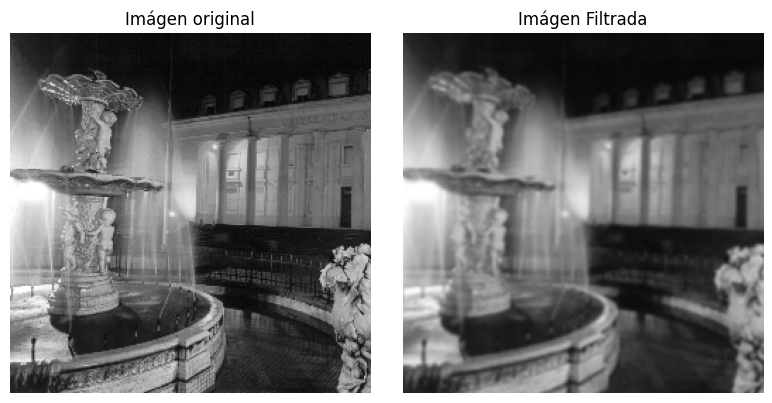

In [60]:
# Asegúrate de que im2 tenga las mismas dimensiones que im[:,:,0]
R = _convolution1(im[:,:,0], gausiano)
G = _convolution1(im[:,:,1], gausiano)
B = _convolution1(im[:,:,2], gausiano)

# Apila los canales R, G y B en una sola imagen
im3 = np.dstack((R, G, B))

#plt.imshow(im3)
#plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(im)
plt.title("Imágen original")
plt.axis('off')
plt.subplot(122)
plt.imshow(im3)
plt.title("Imágen Filtrada")
plt.axis('off')
plt.tight_layout()
plt.show()

**** (254, 254)
**** (254, 254)
**** (254, 254)


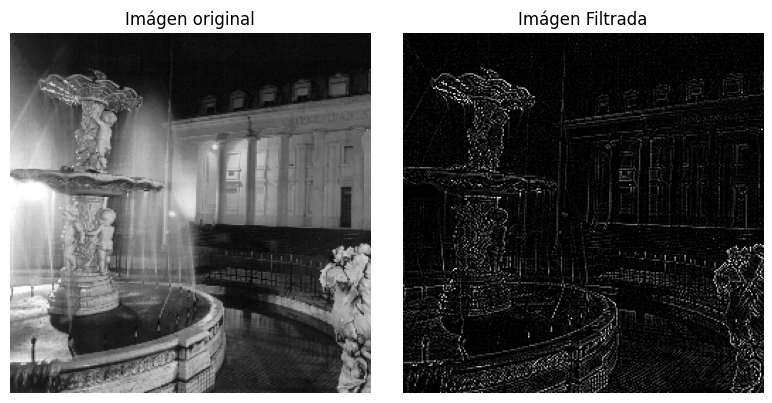

In [67]:
# Asegúrate de que im2 tenga las mismas dimensiones que im[:,:,0]
R = _convolution1(im[:,:,0], laplaciano)
G = _convolution1(im[:,:,1], laplaciano)
B = _convolution1(im[:,:,2], laplaciano)

# Apila los canales R, G y B en una sola imagen
im3 = RGB_to_bytes(np.dstack((R, G, B)))

#plt.imshow(im3)
#plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(im)
plt.title("Imágen original")
plt.axis('off')
plt.subplot(122)
plt.imshow(im3)
plt.title("Imágen Filtrada")
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\Luciano-PC\AppData\Local\Temp\ipykernel_35152\1764247004.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.clip(imageio.imread('chip_blackwhite.bmp') / 255.0, 0.0, 1.0)


**** (244, 276)
**** (244, 276)
**** (244, 276)


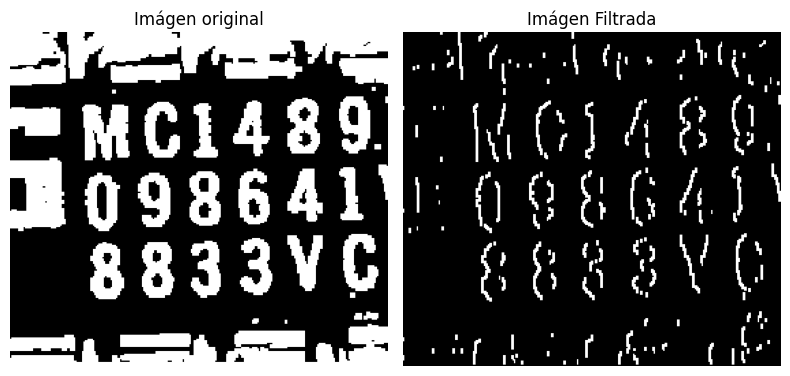

In [71]:
# Cargar la imagen y el kernel
im = np.clip(imageio.imread('chip_blackwhite.bmp') / 255.0, 0.0, 1.0)

#yiq = rgb_to_yiq(im)

#im2=_convolution1(yiq[:, :, 0],laplaciano)
'''
Luego de palicar laplaciano:
si la luminancia es menor que cero, se coerciona a cero, o si es mayor que uno se
coerciona a uno.'''

R = _convolution1(im[:,:,0], sobel)
G = _convolution1(im[:,:,1], sobel)
B = _convolution1(im[:,:,2], sobel)

# Apila los canales R, G y B en una sola imagen
im3 = RGB_to_bytes(np.dstack((R, G, B)))

#plt.imshow(im3)
#plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(im)
plt.title("Imágen original")
plt.axis('off')
plt.subplot(122)
plt.imshow(im3)
plt.title("Imágen Filtrada")
plt.axis('off')
plt.tight_layout()
plt.show()